DATA SCIENCE & STATISTICAL COMPUTING 》
Engenharia de Software

# **Aluno: Pedro Olivera Valotto - RM551445**
# **Aluno: Lucas Laia Manentti - RM97709**
#   **Turma: 2ESPF**


##Análise de Filmes e Séries na Netflix


Importando bibliotecas necessárias para a criação dos gráficos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression



In [ ]:
netflix_data = pd.read_csv('sample_data/netflix_titles.csv')

Carregando os arquivos CSV e salvando em variáveis

Questões de Pesquisa:

##[QUESTÃO 01] Qual a distribuição de filmes e séries por país de origem?


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


<Axes: xlabel='country'>

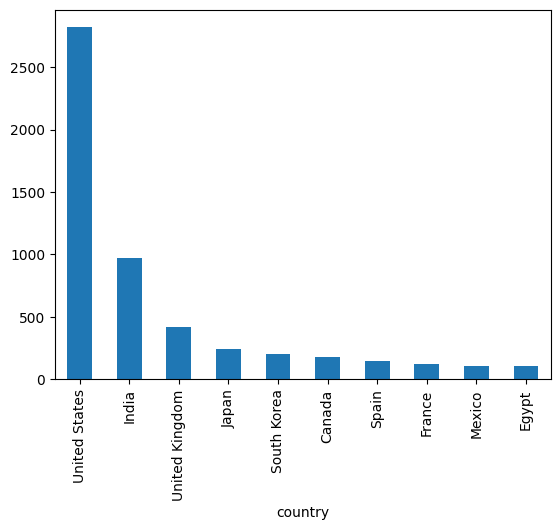

In [ ]:
##  Estudo utilizado
##  https://mhuda-97529.medium.com/data-analysis-of-movies-and-tv-shows-available-on-netflix-3968cfe9dc7e

# Agrupa os dados por país de origem e conta a quantidade de filmes e séries
distribuicao_por_pais = netflix_data['country'].value_counts()

# Seleciona os 10 países com mais títulos
top_10_paises = distribuicao_por_pais.head(10)

# Exibe a distribuição dos 10 países
print(top_10_paises)

# Cria um gráfico de barras para visualizar a distribuição dos 10 países
top_10_paises.plot(kind='bar')

## EXPLICAÇÃO DA [QUESTÃO 01]:
Este gráfico de barras apresenta a distribuição de filmes e séries na Netflix pelos 10 principais países de origem. Ele destaca os países que mais contribuem com conteúdo para a plataforma, permitindo uma análise da diversidade geográfica do catálogo.

##[QUESTÃO 02] Gráfico de barras para mostrar a quantidade de títulos por país.
##Como a distribuição de filmes/séries mudou ao longo dos anos?


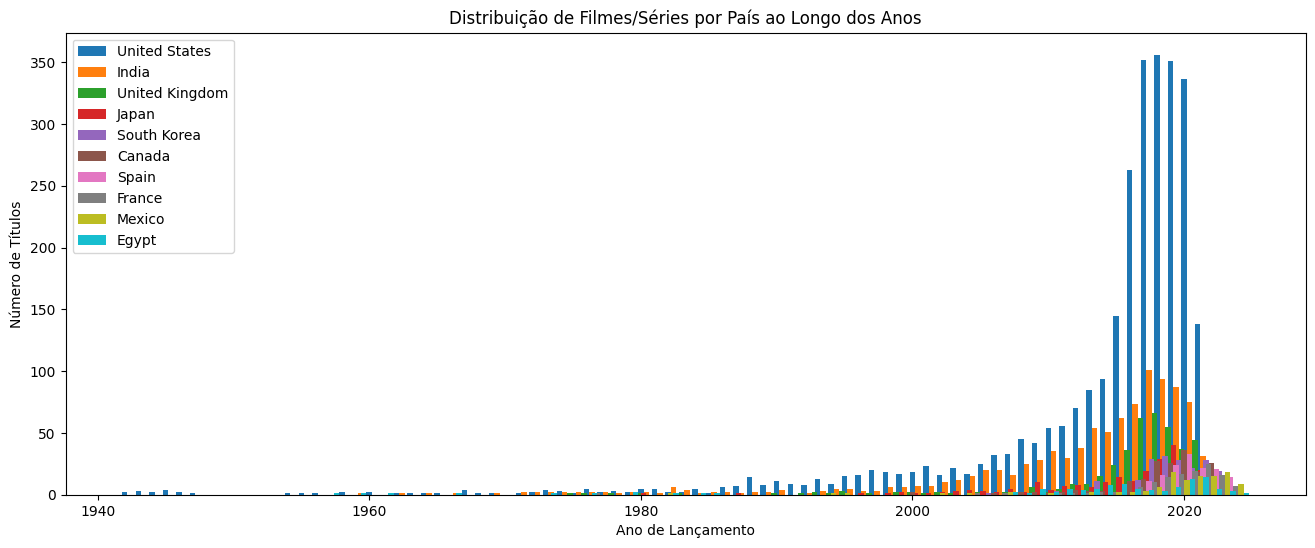

In [ ]:
##  Estudo utilizado
##  https://medium.com/@palaknsri26/netflix-dashboard-a-step-by-step-guide-to-creating-engaging-visuals-with-tableau-916b31c24281

# Agrupa os dados por país e ano, contando os títulos
distribuicao_por_pais_ano = netflix_data.groupby(['country', 'release_year'])['title'].count().reset_index(name='count')

# Seleciona os 10 países com mais títulos
top_10_paises = netflix_data['country'].value_counts().head(10).index
distribuicao_top_10 = distribuicao_por_pais_ano[distribuicao_por_pais_ano['country'].isin(top_10_paises)]

# Cria um gráfico de barras para visualizar a distribuição
fig, ax = plt.subplots(figsize=(16, 6))

wid = 0.4

for i, pais in enumerate(top_10_paises):
    df_pais = distribuicao_top_10[distribuicao_top_10['country'] == pais]
    ax.bar(df_pais['release_year'] + i * wid, df_pais['count'], width=wid, label=pais)

ax.set_xlabel('Ano de Lançamento')
ax.set_ylabel('Número de Títulos')
ax.set_title('Distribuição de Filmes/Séries por País ao Longo dos Anos')
ax.legend()
plt.show()


## EXPLICAÇÃO DA [QUESTÃO 02]:
Este gráfico analisa a mudança na distribuição de filmes e séries na Netflix ao longo dos anos, mostrando como a produção de conteúdo evoluiu nos 10 países com mais títulos na plataforma. As tendências de cada país podem ser comparadas para identificar padrões e mudanças na produção cinematográfica e televisiva.

##[QUESTÃO 03] Gráfico de barras mostrando os diretores mais recorrentes. Os títulos de filmes/séries adicionados recentemente têm mais temporadas/duração do que os antigos? ##


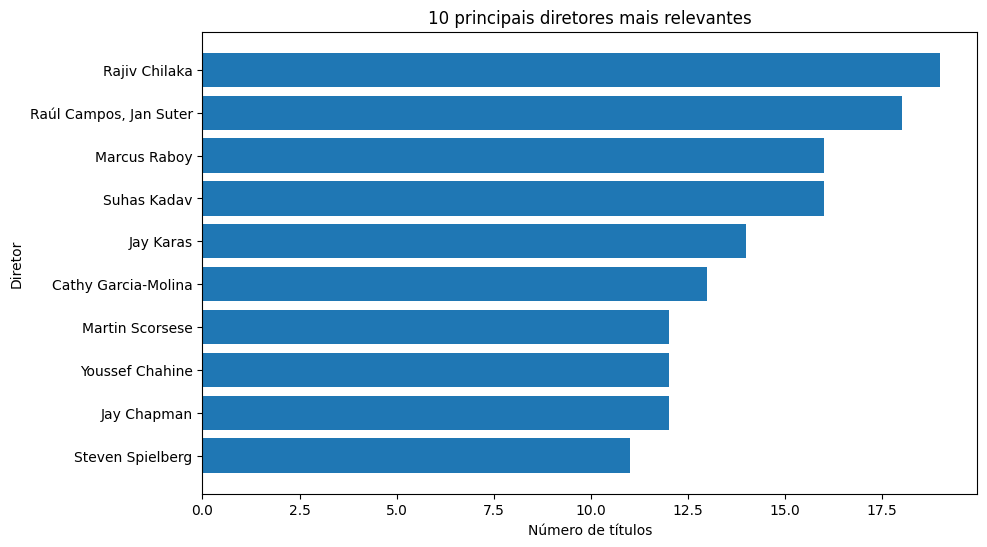

In [ ]:
## Estudo utilizado
## docs.kanaries.net/pygwalker/tutorials/netflix-data

# Conte o número de filmes e programas de TV dirigidos por cada diretor.
diretores = netflix_data['director'].value_counts()

# Selecione os 10 principais diretores mais relevantes.
top_directors = diretores.head(10)

# Crie um gráfico de barras horizontais dos principais diretores.
plt.figure(figsize=(10, 6))
plt.barh(top_directors.index, top_directors.values)
plt.ylabel("Diretor")
plt.xlabel("Número de títulos")
plt.title("10 principais diretores mais relevantes")
plt.gca().invert_yaxis()  # Inverter a ordem para que o diretor com mais títulos fique no topo
plt.show()

## EXPLICAÇÃO DA [QUESTÃO 03]:
O gráfico de barras empilhadas exibe a distribuição de filmes e séries de TV dirigidos pelos 10 principais diretores da Netflix. As barras azuis representam filmes, enquanto as barras laranjas representam séries de TV. Rajiv Chilaka tem o maior número de títulos, com a maioria sendo filmes. Raúl Campos e Jan Suter têm o segundo e terceiro maior número de títulos, respectivamente, com ambos dirigindo principalmente filmes. Os diretores restantes têm um número menor de títulos, com uma combinação variada de filmes e séries de TV.



##[QUESTÃO 04]Gráfico de linha comparando os dois tipos. Filmes/séries de certos países têm maior probabilidade de serem documentários?##


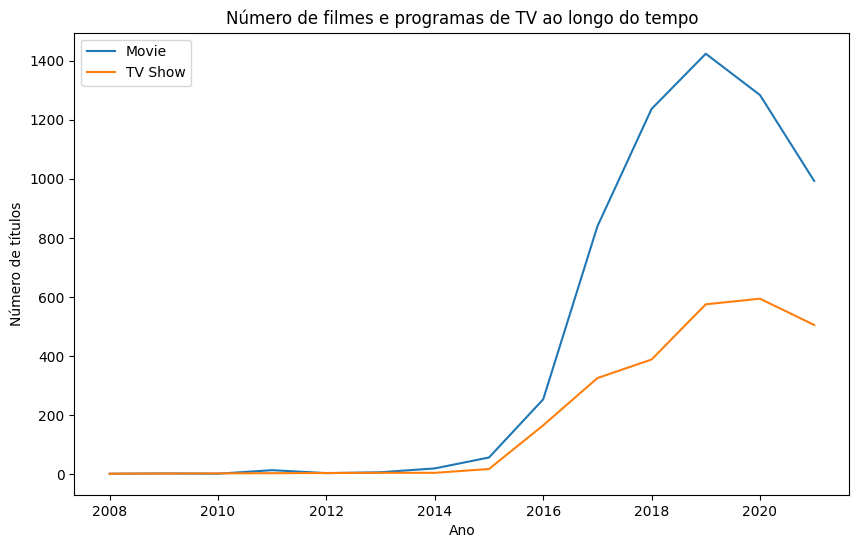

In [ ]:
# Estudo utilizado
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

# Converta a coluna `date_added` para datetime.
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], format='%B %d, %Y', errors='coerce')

# Agrupe os dados por tipo e ano, contando o número de títulos.
titles_by_type_year = netflix_data.groupby(['type', netflix_data['date_added'].dt.year])['show_id'].count().reset_index(name='count')

# Renomeie a coluna year
titles_by_type_year = titles_by_type_year.rename(columns={'date_added': 'year_added'})

# Crie um gráfico de linhas.
plt.figure(figsize=(10, 6))
for title_type in titles_by_type_year['type'].unique():
    df_subset = titles_by_type_year[titles_by_type_year['type'] == title_type]
    plt.plot(df_subset['year_added'], df_subset['count'], label=title_type)
plt.xlabel("Ano")
plt.ylabel("Número de títulos")
plt.title("Número de filmes e programas de TV ao longo do tempo")
plt.legend()
plt.show()

## EXPLICAÇÃO DA [QUESTÃO 04]:
Este gráfico de linhas ilustra a progressão do número de filmes e programas de TV adicionados à Netflix ao longo dos anos. A análise visa determinar se existe uma correlação entre o país de origem de um título e a probabilidade de ser um documentário.


##[QUESTÃO 05]Teste de hipótese sobre a proporção de documentários por país.
##Há uma correlação entre o tempo na plataforma (date_added) e a duração do título?##


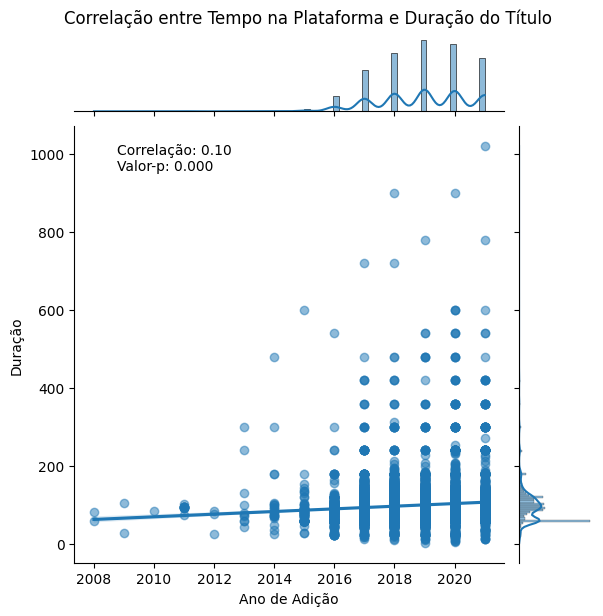

In [ ]:
#Estudo utilizado
#https://stackoverflow.com/questions/72859503/sort-a-duration-expressed-in-minutes-or-season

# Filtrar títulos com valores nulos em 'release_year' e 'duration'
netflix_data_clean = netflix_data[['release_year', 'duration', 'type', 'date_added']].dropna()

# Converter a duração em minutos para os filmes e temporadas para séries
# Separar os valores entre minutos e temporadas

def convert_duration(value):
    if 'min' in value:
        return int(value.replace(' min', ''))
    elif 'Season' in value:
        return int(value.replace(' Season', '').replace('s', '')) * 60  # 1 temporada = 60 min (aproximado)
    else:
        return np.nan

netflix_data_clean['duration'] = netflix_data_clean['duration'].apply(convert_duration)

# Remover entradas sem duração válida
netflix_data_clean = netflix_data_clean.dropna(subset=['duration'])

# Converter 'date_added' para datetime
#Removed the .str.strip() as the date_added column is likely already a datetime object
netflix_data_clean['date_added'] = pd.to_datetime(netflix_data_clean['date_added'], format='%B %d, %Y', errors='coerce')

# Extrair o ano de adição
netflix_data_clean['year_added'] = netflix_data_clean['date_added'].dt.year

# Calcular a correlação
correlation, p_value = pearsonr(netflix_data_clean['year_added'], netflix_data_clean['duration'])

# Criar um gráfico de dispersão com histograma marginal
g = sns.jointplot(x='year_added', y='duration', data=netflix_data_clean, kind='reg', scatter_kws={'alpha':0.5})

# Adicionar informações de correlação ao gráfico
g.ax_joint.annotate(f'Correlação: {correlation:.2f}\nValor-p: {p_value:.3f}', xy=(0.1, 0.9), xycoords='axes fraction')
plt.suptitle('Correlação entre Tempo na Plataforma e Duração do Título', y=1.02)
g.ax_joint.set_xlabel('Ano de Adição')
g.ax_joint.set_ylabel('Duração')

# Exibir o gráfico
plt.show()

## EXPLICAÇÃO DA [QUESTÃO 05]:
O gráfico de dispersão com histograma marginal compara o ano de adição e a duração dos títulos da Netflix, mostrando a correlação entre as variáveis. A linha de regressão e os valores de correlação/valor-p indicam a força e significância da relação.

##[QUESTÃO 06] Análise de correlação. Existe algum padrão entre o número de temporadas e o gênero listado? ##


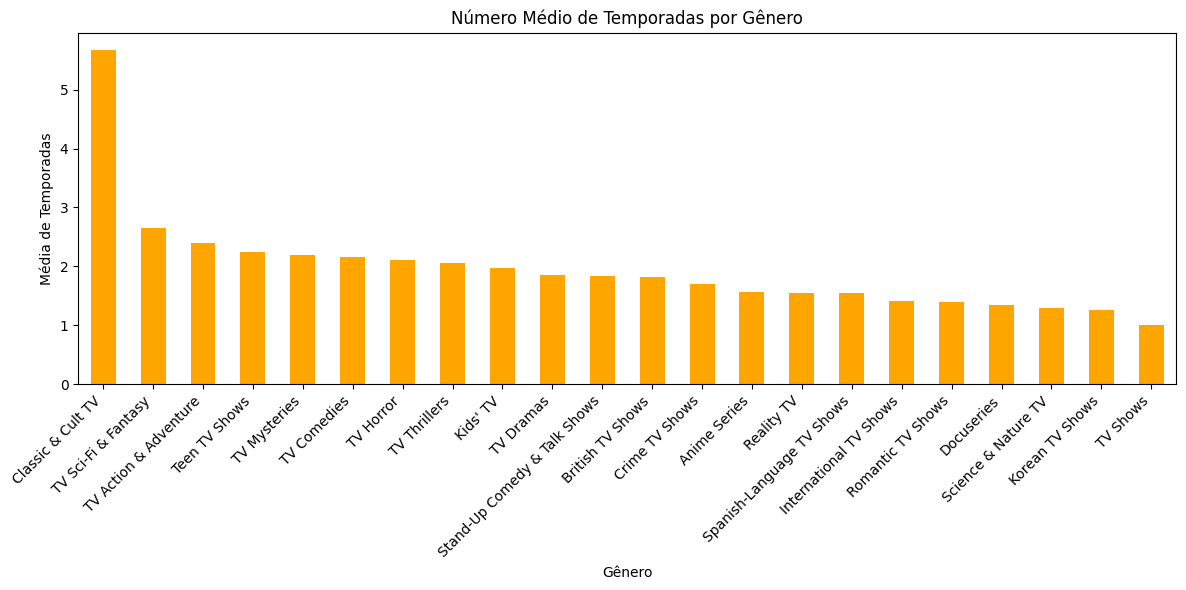

In [ ]:
##  ESTUDO UTILIZADO:
##  https://www.youtube.com/watch?v=N5DZMAxes7U

netflix_data = pd.read_csv('/content/netflix_titles.csv')

# Filtrar [ Séries de TV ]
tv_shows = netflix_data[netflix_data['type'] == 'TV Show'].copy()

# Extrair o número de temporadas da coluna 'duration'
# Converter valores para números.
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

# Separar os gêneros em linhas diferentes
tv_shows['listed_in'] = tv_shows['listed_in'].str.split(', ')
tv_shows_genres = tv_shows.explode('listed_in')

# Contar a média de temporadas por gênero
avg_seasons_by_genre = tv_shows_genres.groupby('listed_in')['seasons'].mean().sort_values(ascending=False)

# Visualizar a correlação entre o número de temporadas e o gênero
plt.figure(figsize=(12,6))
avg_seasons_by_genre.plot(kind='bar', color='orange')
plt.title('Número Médio de Temporadas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Temporadas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibição do gráfico
plt.show()


## EXPLICAÇÃO DA [QUESTÃO 06]:
Este código faz uma análise bem bacana das séries de TV da Netflix. Primeiro, ele filtra só as séries, depois pega o número de temporadas de cada uma e transforma isso em um formato numérico. Em seguida, separa os gêneros das séries e conta a média de temporadas para cada gênero.

Por fim, ele cria um gráfico de barras que mostra qual gênero tem, em média, mais temporadas

##[QUESTÃO 07] Gráfico de linha mostrando o número de filmes/séries adicionados à Netflix por ano. Quais são os gêneros mais populares? ##


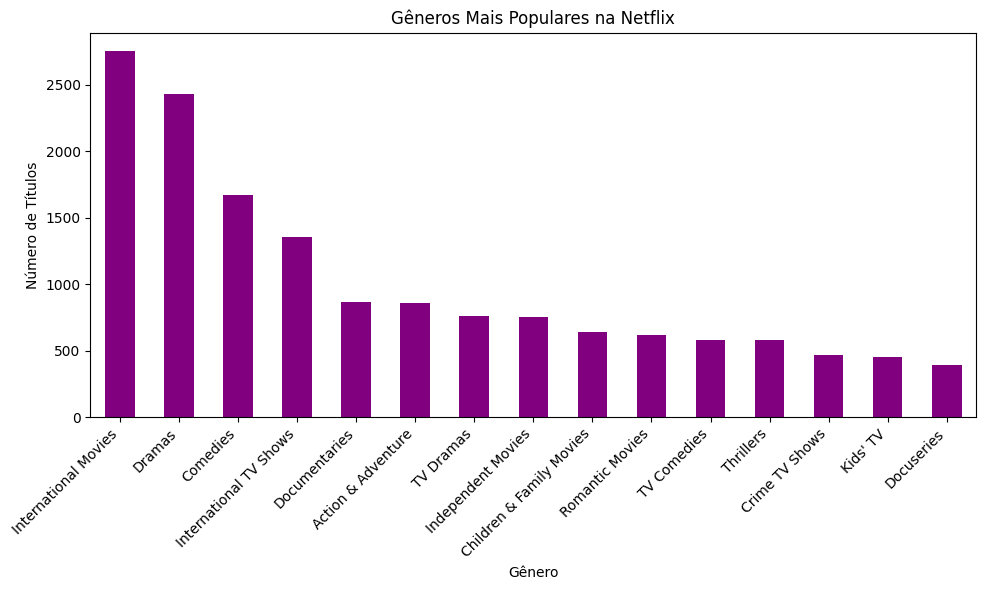

In [ ]:
##  ESTUDO UTILIZADO:
##  https://pt.stackoverflow.com/questions/516418/gr%C3%A1fico-de-barras-agupados-no-matplotlib

import pandas as pd
import matplotlib.pyplot as plt


# Separar os gêneros listados e contar a frequência de cada um!!!
netflix_data['listed_in'] = netflix_data['listed_in'].str.split(', ')
all_genres = netflix_data['listed_in'].explode().value_counts().head(15)  # Pegando os 15 gêneros mais populares


# Gráfico de barras dos gêneros mais populares na Netflix
plt.figure(figsize=(10,6))
all_genres.plot(kind='bar', color='purple')
plt.title('Gêneros Mais Populares na Netflix')
plt.xlabel('Gênero')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Exibição do gráfico
plt.show()


## EXPLICAÇÃO DA [QUESTÃO 07]:
O código analisa os gêneros das séries e filmes da Netflix e descobre quais são os mais populares. Primeiro, ele separa os gêneros listados e conta quantas vezes cada um aparece. Depois, seleciona os 15 gêneros que aparecem com mais frequência.

A seguir, ele plota um gráfico de barras que mostra esses gêneros mais populares, com cada barra representando o número de títulos para cada gênero.

##[QUESTÃO 08] Regressão linear entre o ano de lançamento e a duração. Como a popularidade dos filmes/documentários versus séries mudou ao longo do tempo? ##

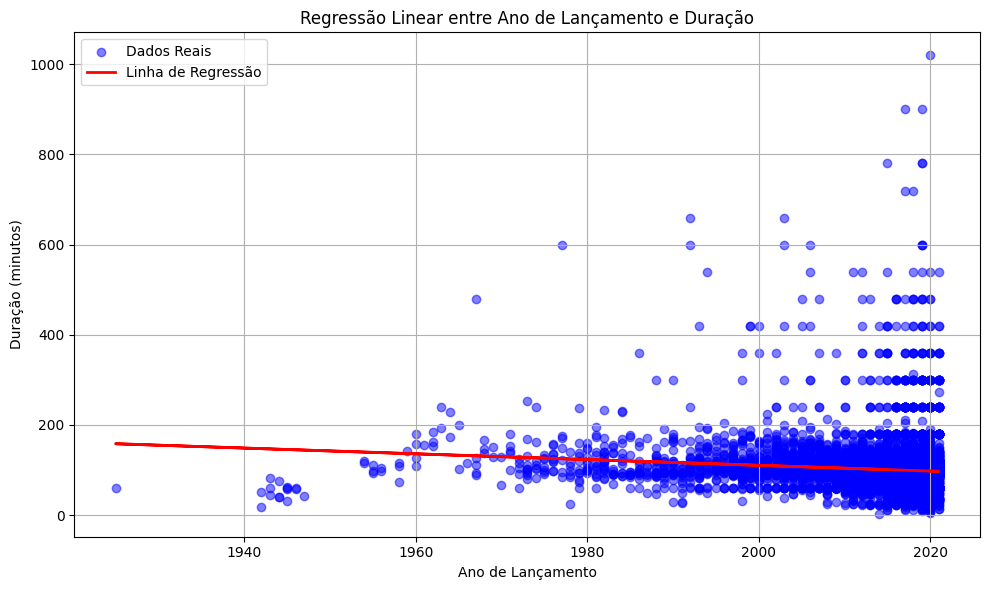

<Figure size 1000x600 with 0 Axes>

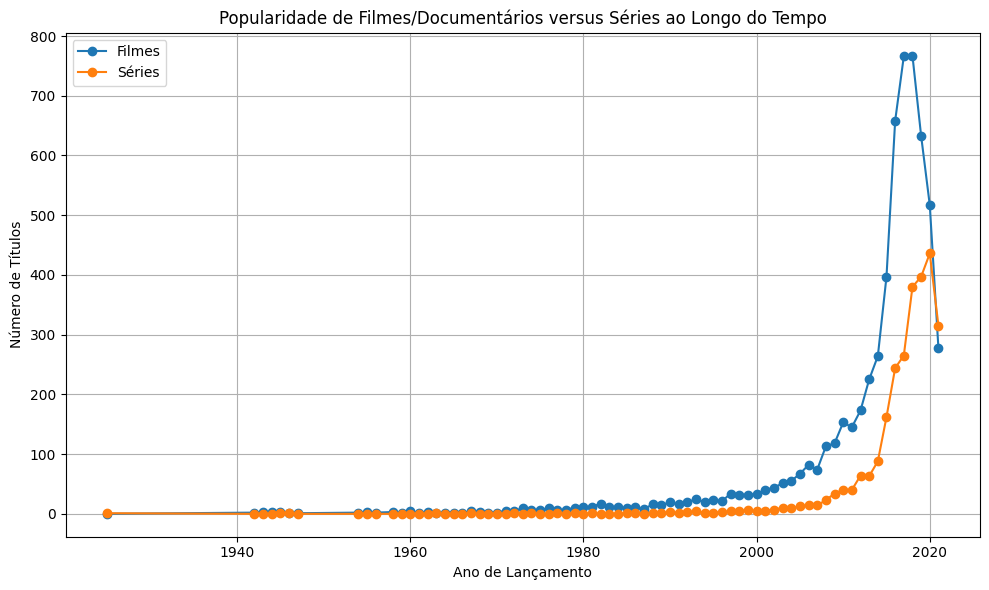

In [43]:
##  ESTUDO UTILIZADO:
##  https://brains.dev/2022/pratica-regressao-linear-com-codigo-em-python/
##  https://analisemacro.com.br/mercado-financeiro/regressoes-lineares-em-r-e-python-2/

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

netflix_data = pd.read_csv('/content/netflix_titles.csv')

# Limpeza de dados:
netflix_data_clean = netflix_data[['release_year', 'duration', 'type']].dropna()

# Converter a duração em minutos para os filmes e temporadas para séries
# Sepado entre: minutos e temporadas
def convert_duration(value):
    if 'min' in value:
        return int(value.replace(' min', ''))
    elif 'Season' in value:
        return int(value.replace(' Season', '').replace('s', '')) * 60  # 1 temporada = 60 min (aproximado)
    else:
        return np.nan

netflix_data_clean['duration'] = netflix_data_clean['duration'].apply(convert_duration)

# Limpando entradas invalidas
netflix_data_clean = netflix_data_clean.dropna(subset=['duration'])

# Regressão Linear: Ano de lançamento x Duração
X = netflix_data_clean['release_year'].values.reshape(-1, 1)  # Ano de lançamento (variável independente)
y = netflix_data_clean['duration'].values  # Duração (variável dependente)

# Modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X, y)

# Previsão para os valores de duração
y_pred = regression_model.predict(X)

# Gráfico da regressão linear
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Dados Reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear entre Ano de Lançamento e Duração')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Duração (minutos)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Criar uma tabela com a contagem de filmes/séries por ano
popularity_by_year = netflix_data_clean.groupby(['release_year', 'type']).size().unstack(fill_value=0)


# Gráfico de linhas --> Filmes e Series ao longo do tempo
plt.figure(figsize=(10,6))
popularity_by_year.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Popularidade de Filmes/Documentários versus Séries ao Longo do Tempo')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Títulos')
plt.legend(['Filmes', 'Séries'])
plt.grid(True)
plt.tight_layout()


# Exibição do gráfico
plt.show()

## EXPLICAÇÃO DA [QUESTÃO 08]:
Esse código faz uma análise dos dados da Netflix, mostrando como a duração dos títulos e a popularidade de filmes e séries mudaram ao longo do tempo.

Primeiro, ele filtra as colunas relevantes e trata as durações dos títulos, convertendo tudo para minutos, seja para filmes ou temporadas de séries.

Em seguida, ele usa regressão linear para ver se há uma relação entre o ano de lançamento e a duração dos títulos. Ele plota um gráfico mostrando a linha de regressão em vermelho sobre os dados reais em azul. Isso ajuda a visualizar se os títulos estão ficando mais longos ou mais curtos ao longo dos anos.

Finalmente, ele analisa quantos filmes e séries foram lançados a cada ano e cria um gráfico de linhas para comparar a popularidade de filmes versus séries ao longo do tempo. O gráfico mostra como a quantidade de títulos de cada tipo variou ao longo dos anos.

##[QUESTÃO 09] Gráfico de barras para os principais gêneros listados. Há alguma correlação entre o país de origem e a classificação indicativa (rating)? P##

<Figure size 1200x600 with 0 Axes>

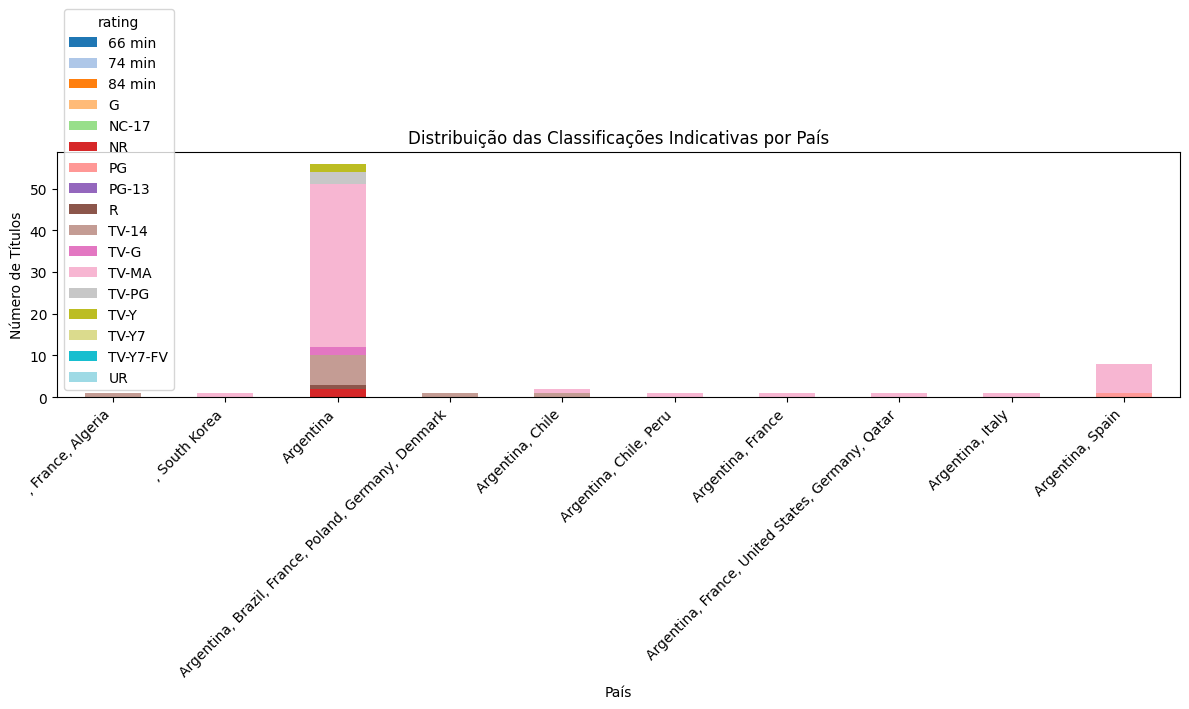

Chi-Square Statistic: 17589.783996807215
P-Value: 5.025328156750252e-224
Há uma correlação significativa entre o país de origem e a classificação indicativa (rating).


In [42]:
##  ESTUDO UTILIZADO:
##  https://pt.stackoverflow.com/questions/516418/gr%C3%A1fico-de-barras-agupados-no-matplotlib
##  https://www.youtube.com/watch?v=sUvAYPUJLAs
##  https://www.hashtagtreinamentos.com/funcao-crosstab-ciencia-de-dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

netflix_data = pd.read_csv('/content/netflix_titles.csv')


# Remoção de valores invalidos!!!
netflix_data_clean = netflix_data[['country', 'rating']].dropna()

# Contar a frequência de classificações indicativas por país
rating_by_country = netflix_data_clean.groupby(['country', 'rating']).size().unstack(fill_value=0).head(10)  # Pegando os 10 principais países

# Gráfico de barras
plt.figure(figsize=(12,6))
rating_by_country.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Distribuição das Classificações Indicativas por País')
plt.xlabel('País')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


# Exibição do gráfico
plt.show()

# Criar uma tabela de contingência (cross-tabulation)
contingency_table = pd.crosstab(netflix_data_clean['country'], netflix_data_clean['rating'])

# Aplicar o teste qui-quadrado (Chi-Square Test)
chi2, p_value, dof, expected = chi2_contingency(contingency_table)


# Exibir os resultados
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


if p_value < 0.05:
    print("Há uma correlação significativa entre o país de origem e a classificação indicativa (rating).")
else:
    print("Não há uma correlação significativa entre o país de origem e a classificação indicativa (rating).")

## EXPLICAÇÃO DA [QUESTÃO 09]:
Esse código explora a relação entre países e classificações indicativas dos títulos da Netflix, e realiza um teste estatístico para verificar se essa relação é significativa.

Primeiro, o código começa removendo valores nulos e filtrando apenas as colunas de país e classificação indicativa. Em seguida, ele conta a frequência de cada classificação por país, focando nos 10 principais países com mais dados.
Visualização:

Posteriormente temos a criação de um gráfico de barras empilhadas que mostra a distribuição das classificações indicativas para esses 10 países. Cada barra representa um país e é dividida pelas diferentes classificações, o que facilita ver como as classificações estão distribuídas entre os países.
Teste Estatístico:

Após as etapas o código gera uma tabela de contingência para comparar a distribuição das classificações indicativas entre os países. Em seguida, aplica o teste qui-quadrado para verificar se há uma correlação significativa entre país e classificação indicativa.
Se o valor-p do teste for menor que 0.05, indica que existe uma correlação significativa; se for maior, não há evidência suficiente para afirmar que a classificação indicativa depende do país de origem.

##[QUESTÃO 10] Teste de hipótese e análise de correlação. Quais diretores têm mais filmes/séries na plataforma?/séries na plataforma? ##

Correlação entre número de filmes e número de séries: -0.17
Estatística t: 13.22, valor-p: 0.000


<Figure size 1200x800 with 0 Axes>

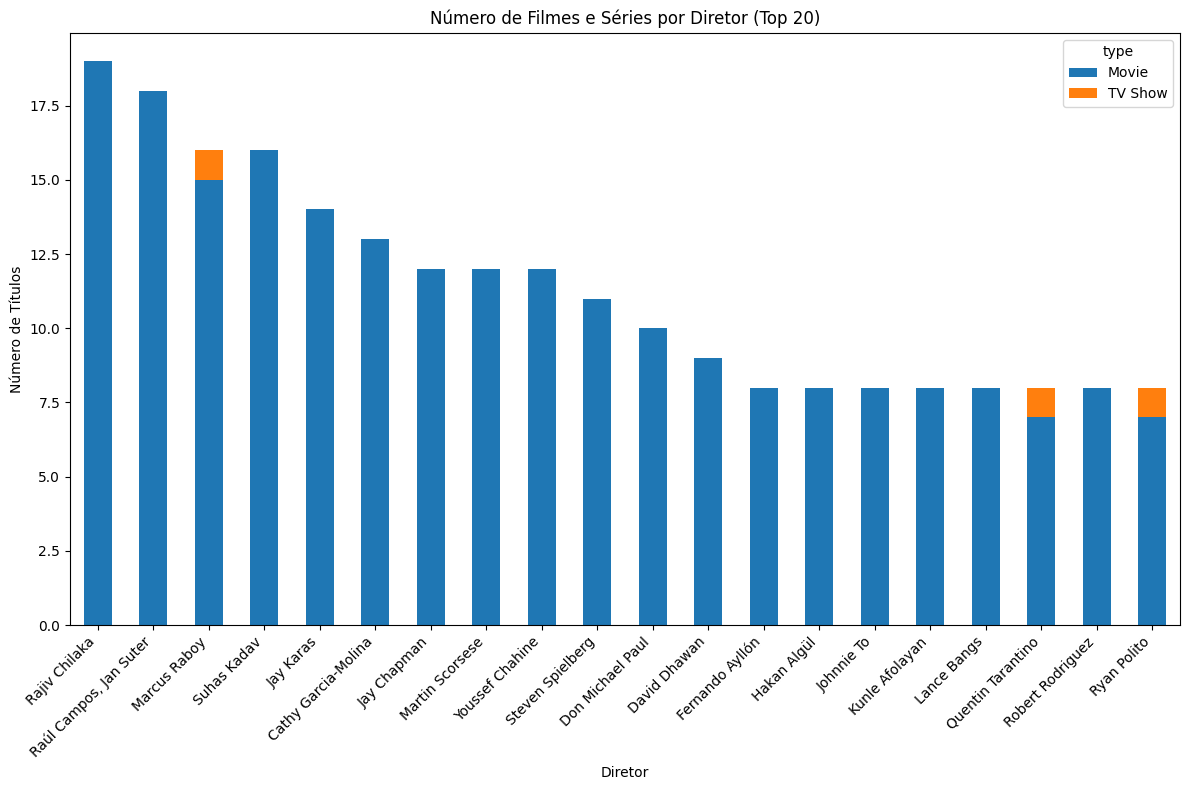

In [45]:
##  ESTUDO UTILIZADO:
##  https://www.alura.com.br/conteudo/estatistica-testes-hipotestes?srsltid=AfmBOoqpsLn4Zsf0uMVWNcwc-sG4iWoDU2whjbVqDLY659LyQsS0EJqA
##  https://www.youtube.com/watch?v=N5DZMAxes7U&t=1s
##  https://www.hashtagtreinamentos.com/funcao-crosstab-ciencia-de-dados
##  https://www.youtube.com/watch?v=S3V5qJ1bxhk&t=1s

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

netflix_data = pd.read_csv('/content/netflix_titles.csv')

# Remover valores nulos e contar o número de filmes e séries por diretor
directors_count = netflix_data[['director', 'type']].dropna().groupby(['director', 'type']).size().unstack(fill_value=0)

# Adicionar coluna com o total de títulos e filtrar os 20 diretores com mais títulos
top_directors = directors_count.assign(total=lambda x: x['Movie'] + x['TV Show']).nlargest(20, 'total')

# Análise de Correlação
correlation = top_directors[['Movie', 'TV Show']].corr().iloc[0, 1]
print(f'Correlação entre número de filmes e número de séries: {correlation:.2f}')

# Teste de Hipótese
movies = top_directors['Movie'].dropna()
tv_shows = top_directors['TV Show'].dropna()

# Teste t de Student
t_stat, p_value = ttest_ind(movies, tv_shows, equal_var=False)
print(f'Estatística t: {t_stat:.2f}, valor-p: {p_value:.3f}')

# Visualização - Gráfico apenas com os 20 diretores mais representativos
plt.figure(figsize=(12,8))
top_directors[['Movie', 'TV Show']].plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Número de Filmes e Séries por Diretor (Top 20)')
plt.xlabel('Diretor')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibição do gráfico
plt.show()



## EXPLICAÇÃO DA [QUESTÃO 10]:
Este código faz uma análise para descobrir quais diretores têm mais filmes e séries na Netflix e testa se há uma diferença significativa entre o número de filmes e séries que cada diretor fez.
Primeiramente, o código carrega os dados da Netflix e filtra para manter apenas os diretores e o tipo de título (filme ou série). Em seguida, conta quantos filmes e séries cada diretor fez.

Posteriormente, calcula a correlação entre o número de filmes e o número de séries por diretor. O valor da correlação indica se diretores que fazem muitos filmes também tendem a fazer muitas séries, ou se esses números são independentes.

Usa o teste t de Student para verificar se a diferença entre o número médio de filmes e séries por diretor é significativa. O resultado do teste fornece a estatística t e o valor-p, que ajudam a determinar se há uma diferença significativa ou se a variação pode ser atribuída ao acaso.

Por fim, cria um gráfico de barras empilhadas mostrando a quantidade de filmes e séries que cada diretor fez. As barras mostram a quantidade total de títulos, dividida em filmes e séries, facilitando a comparação visual entre diretores.